# Exercise 9 – Using nhanes survey data to examine the link between education and income

### Introduction

Today, we will work with the National Health and Nutrition Examination Survey (nhanes) data from the USA National Center for Health Statistics (https://www.cdc.gov/nchs/nhanes/about_nhanes.htm). As preparation for today’s class, you already took a look at the data and explored the variables that will be used today. The objective of this activity is to practice the R coding skills you acquired over the last few weeks, and to prepare you for the midterm exam of coming Thursday. Therefore, try to work on this activity independently,
save your script as a .R file and upload it to Canvas, export the graphs as .pdf files uploading them to Canvas as well.

This activity includes more questions than you are expected to be able to answer during class. The rest of the questions can be used for extra practice at home. A .html document with solutions to all questions will be available at the end of the day so you will be able to check your answers.

In [1]:
nhanes <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 9 - Analyzing Healthcare Statuses/nhanes.csv")

### Challenge: Use the Nhanes survey data to examine the relationship between income and education.

You just started college. For many of you, the idea that a better education augments the probability of landing a good paying job will have played at least some role in your decision to go to college, apart from the obvious fact that Yale-NUS is such a great place to be spending the coming 4 years of your life. There are many studies that provide support for the notion that income and level of education are positively correlated. On the other hand, students are taking out more and more loans to finance their studies, which often turns out to be a significant long-term financial burden. In this challenge, we will explore the Nhanes survey data from 2000 and 2018 to see if we can find support for the idea that higher education increases the probability that you will earn more later in life.

### Step 1: Check what the categories are for income and educational level.

In [2]:
unique(nhanes$income_class)

[1] <NA>             15,000 to 19,999 75,000 and over  5,000 to 9,999  
 [5] 35,000 to 44,999 Over 20,000      20,000 to 24,999 25,000 to 34,999
 [9] 65,000 to 74,999 45,000 to 54,999 10,000 to 14,999 0 to 4,999      
[13] 55,000 to 64,999 Under 20,000    
13 Levels: 0 to 4,999 10,000 to 14,999 15,000 to 19,999 ... Under 20,000

In [3]:
unique(nhanes$educ)

[1] <NA>                      college graduate or above
[3] 9-11th grade              High School              
[5] some college or AA        < 9th grade              
5 Levels: < 9th grade 9-11th grade college graduate or above ... some college or AA

### Step 2: Make a new dataframe with variables and values we need

Make a new data frame from which all NA in the columns educ and income_class are removed, and only the columns id, year, income_class, income_mid, and educ are included. Also, remove the income classes “Under 20,000” and “Over 20,000”.

In [5]:
# Remove NA values and include only these 5 columns
income_educ <- nhanes[!is.na(nhanes$income_class) & !is.na(nhanes$educ),
                      c("id", "year", "income_class", "income_mid", "educ")]

# Remove the income classes
income_educ <- income_educ[income_educ$income_class != "Under 20,000" &
                             income_educ$income_class != "Over 20,000", ]

## Question 1: What is the proportion of people with at least a college degree in each of the income groups?

### Step 1: Get the number of participants per income class

Use the function table() to get the number of participants per income class. Use the variable income_mid instead of income_class, that will be easier for plotting later on.

In [7]:
table_all_income <- table(income_educ$income_mid)
table_all_income


  2500   7500  12500  17500  22500  30000  40000  50000  60000  70000  87500 
   210    428    601    594    625   1025    873    649    549    407    460 
100000 
  1491 

### Step 2: Use subsetting to create a new data frame coll_grads with only college graduates or above.

In [8]:
coll_grads <- income_educ[income_educ$educ == "college graduate or above", ]

### Step 3: get the number of college graduates per income class

Again use table() to get the number of college graduates per income class (use income_mid, as before).

In [9]:
table_coll_income <- table(coll_grads$income_mid)
table_coll_income


  2500   7500  12500  17500  22500  30000  40000  50000  60000  70000  87500 
    21     14     35     48     57    112    123    121    120    114    167 
100000 
   760 

### Step 4: calculate the percentage of college graduates in each income class

From the previous two tables, calculate the percentage of college graduates in each income class. (Hint: you can perform element-wise arithmetic on R tables.)

In [10]:
table_perc_coll <- 100 * table_coll_income / table_all_income
table_perc_coll


     2500      7500     12500     17500     22500     30000     40000     50000 
10.000000  3.271028  5.823627  8.080808  9.120000 10.926829 14.089347 18.644068 
    60000     70000     87500    100000 
21.857923 28.009828 36.304348 50.972502 

### Step 5: plot the percentage of college graduates per income class.

Finally, plot the results in a barplot, with percentage of college graduates per income class.

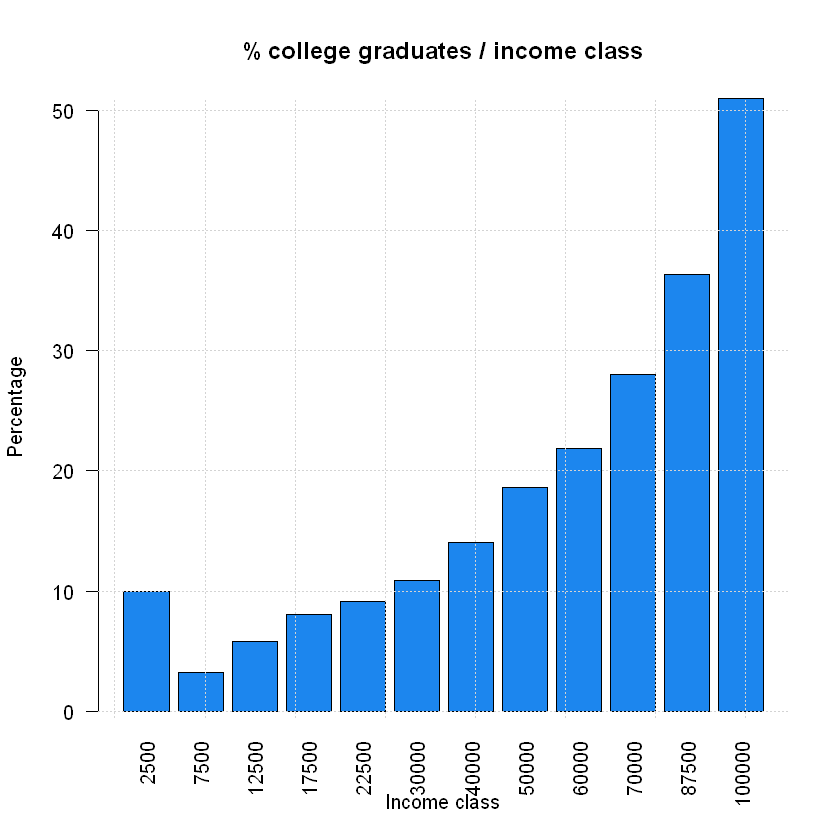

In [11]:
barplot(table_perc_coll,
        col = "dodgerblue2",
        ylab="Percentage",
        xlab = "Income class",
        main = "% college graduates / income class",
        las = 2)
grid()

## Question 2: What is the proportion of people with an income of <= 20,000 in each of the educational levels?

### Step 1: get the number of participants per educational level.

Use table() to get the number of participants per educational level.

In [12]:
table_educ_all <- table(income_educ$educ)
table_educ_all


              < 9th grade              9-11th grade college graduate or above 
                      933                      1157                      1692 
              High School        some college or AA 
                     1862                      2268 

### Step 2: Create a new data frame with only lower-income participants

Use subsetting to create a new data frame low_income with only participants with an income of 20,000 or below. First take again a good look at which income classes you need to include here first.

In [14]:
sort(unique(income_educ$income_class))

[1] 0 to 4,999       10,000 to 14,999 15,000 to 19,999 20,000 to 24,999
 [5] 25,000 to 34,999 35,000 to 44,999 45,000 to 54,999 5,000 to 9,999  
 [9] 55,000 to 64,999 65,000 to 74,999 75,000 and over 
13 Levels: 0 to 4,999 10,000 to 14,999 15,000 to 19,999 ... Under 20,000

Now create a new data frame low_income with only participants with an income of 20,000 or below. Tip: You’ll need to subset 5 of the income categories, and you’ll need the | symbol (which stands for “or”).

In [19]:
low_income <- income_educ[income_educ$income_class == "Under 20,000" |
                            income_educ$income_class == "0 to 4,999" |
                            income_educ$income_class == "5,000 to 9,999" |
                            income_educ$income_class == "10,000 to 14,999" |
                            income_educ$income_class == "15,000 to 19,999", ]

sort(unique(low_income$income_class))

head(low_income)

[1] 0 to 4,999       10,000 to 14,999 15,000 to 19,999 5,000 to 9,999  
13 Levels: 0 to 4,999 10,000 to 14,999 15,000 to 19,999 ... Under 20,000

,id,year,income_class,income_mid,educ
4,7197,2000,"5,000 to 9,999",7500,9-11th grade
34,1080,2000,"5,000 to 9,999",7500,9-11th grade
41,2745,2000,"15,000 to 19,999",17500,< 9th grade
60,773,2000,"10,000 to 14,999",12500,some college or AA
72,5420,2000,"15,000 to 19,999",17500,some college or AA
89,8719,2000,"5,000 to 9,999",7500,< 9th grade


### Step 3: get the number of participants with low income per educational level

Use again the table() function to get the number of participants with low income per educational level.

In [20]:
table_educ_low_income <- table(low_income$educ)
table_educ_low_income


              < 9th grade              9-11th grade college graduate or above 
                      460                       408                       118 
              High School        some college or AA 
                      450                       397 

### Step 4: Calculate the percentage of low-income participants in each education level

From the previous tables, find the percentage of low-income participants in each education level.

In [21]:
table_perc_low_income <- 100 * table_educ_low_income / table_educ_all
table_perc_low_income


              < 9th grade              9-11th grade college graduate or above 
                49.303323                 35.263613                  6.973995 
              High School        some college or AA 
                24.167562                 17.504409 

### Step 5: Plot the results
First re-orders the values in table_perc_low_income in order of educational level.

In [22]:
table_perc_low_income <- table_perc_low_income[c("< 9th grade", 
                                                 "9-11th grade", 
                                                 "High School", 
                                                 "some college or AA", 
                                                 "college graduate or above")]

Finally, plot the results in a bar plot where each bar is an educational level, and the height of each bar represents the percentage of low-income participants per educational level. Use names.arg = c() to add (short) x-axis labels.

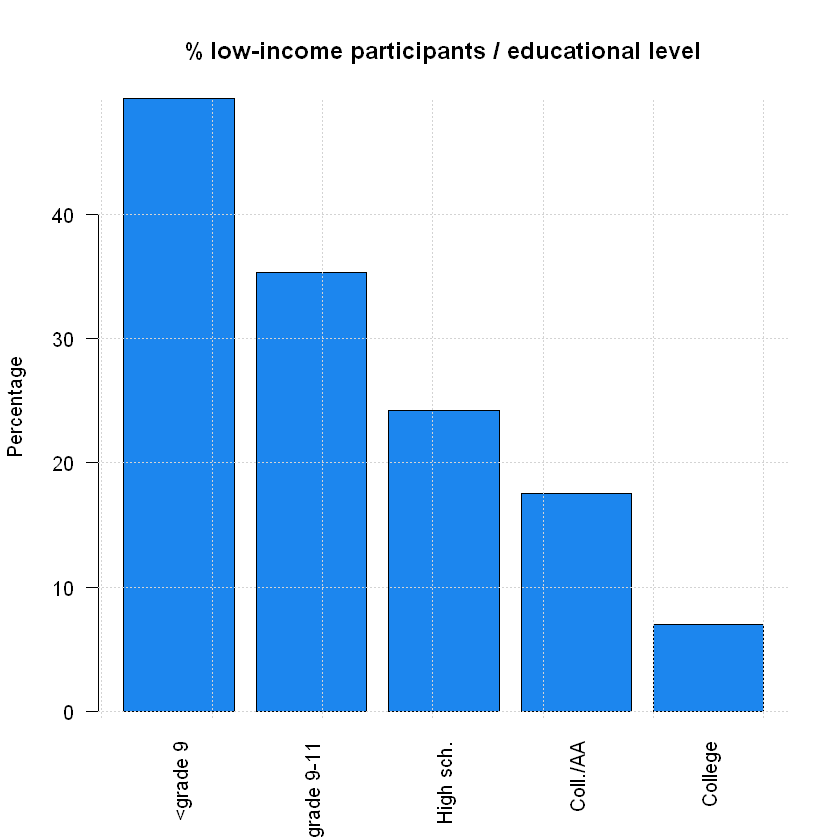

In [23]:
barplot(table_perc_low_income,
        col  = "dodgerblue2",
        main = "% low-income participants / educational level",
        ylab = "Percentage",
        names.arg =
          c("<grade 9", "grade 9-11", "High sch.", "Coll./AA", "College"),
        las = 2)
grid()